In [2]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd


In [3]:
test = pd.read_csv("recall_dataset.csv")
test2 = test.loc[(test['Model Year'] >= 2008) & (test['Model Year'] < 9999)& (test['Recall Type'] == 'VEHICLE')  ]
test2.head()
count = test2['Vehicle Make'].value_counts()
total = count.sum()
ford_count = count[0]
peterbilt_count = count[1]
freightliner_count = count[2]
toyota_count = count[3]
chevrolet_count = count[4]

perc_ford = round((ford_count/total) * 100,2)
perc_peterbilt = round((peterbilt_count/total) * 100,2)
perc_freightliner = round((freightliner_count/total) * 100,2)
perc_toyota = round((toyota_count/total) * 100,2)
perc_chevrolet = round((chevrolet_count/total) * 100,2)

veh_make_allyear = pd.DataFrame({"Makes":["Ford","Peterbilt","Freightliner","Toyota","Chevrolet"],"Total Count":[ford_count,peterbilt_count,freightliner_count,toyota_count,chevrolet_count],"Percentage":[perc_ford,perc_peterbilt,perc_freightliner,perc_toyota,perc_chevrolet]})

veh_make_allyear["Percentage"] = veh_make_allyear["Percentage"].map("{:.2f}%".format)

veh_make_allyear





,Makes,Total Count,Percentage
0,Ford,1089,3.12%
1,Peterbilt,1071,3.07%
2,Freightliner,913,2.61%
3,Toyota,817,2.34%
4,Chevrolet,723,2.07%


In [22]:
describe2008 = test.loc[(test['Model Year'] == 2008) & (test['Recall Type'] == 'VEHICLE') ]


describe2008 = describe2008.loc[(describe2008['Vehicle Make'] == 'FORD') | (describe2008['Vehicle Make'] == 'PETERBILT') | (describe2008['Vehicle Make'] == 'FREIGHTLINER') | (describe2008['Vehicle Make'] == 'TOYOTA') | (describe2008['Vehicle Make'] == 'CHEVROLET') ]
describe2008 = describe2008["Vehicle Make"].value_counts()
describe2008


PETERBILT       173
FREIGHTLINER    171
FORD            145
TOYOTA          130
CHEVROLET        79
Name: Vehicle Make, dtype: int64

In [16]:
describe2008.describe()

count      5.000000
mean     139.600000
std       38.390103
min       79.000000
25%      130.000000
50%      145.000000
75%      171.000000
max      173.000000
Name: Vehicle Make, dtype: float64

In [23]:
describe2017 = test.loc[(test['Model Year'] == 2017) & (test['Recall Type'] == 'VEHICLE') ]


describe2017 = describe2017.loc[(describe2018['Vehicle Make'] == 'FORD') | (describe2018['Vehicle Make'] == 'PETERBILT') | (describe2018['Vehicle Make'] == 'FREIGHTLINER') | (describe2018['Vehicle Make'] == 'TOYOTA') | (describe2018['Vehicle Make'] == 'CHEVROLET') ]
describe2017 = describe2017["Vehicle Make"].value_counts()
describe2017


Series([], Name: Vehicle Make, dtype: int64)

In [24]:
describe2018.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Vehicle Make, dtype: float64

In [3]:
# Describe recall data for all makes
veh_make_allyear.describe()

,Total Count
count,5.000000
mean,922.600000
std,158.741299
min,723.000000
25%,817.000000
50%,913.000000
75%,1071.000000
max,1089.000000


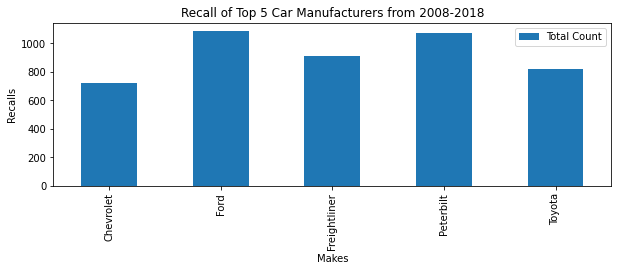

In [4]:
# Car Recalls
car_manufacturers = pd.DataFrame(veh_make_allyear.groupby(["Makes"]).sum()).reset_index()

car_recalls_df = car_manufacturers[["Makes", "Total Count"]]
car_recalls_df = car_recalls_df.set_index("Makes")


#Bar plot showing the total number of recalls per car manufacturer
car_recalls_df.plot(kind="bar", figsize=(10,3))

plt.title("Recall of Top 5 Car Manufacturers from 2008-2018")
plt.xlabel("Makes")
plt.ylabel("Recalls")

plt.savefig('Output/RecallofTop5CarManufacturersfrom2008-2018')
plt.show()

In [5]:
ford_make_year = test.loc[(test['Model Year'] >= 2008) & (test['Model Year'] < 9999)& (test['Recall Type'] == 'VEHICLE') ]

ford_make_year2 = ford_make_year.loc[(ford_make_year['Vehicle Make'] == 'FORD')]

ford_make_year_count = (ford_make_year2["Model Year"].value_counts())
#(ford_make_year_count.sort_index()).to_frame()
ford_df = ford_make_year_count
ford_make_year_count = (ford_make_year_count.sort_index()).to_frame()
ford_make_year_count

,Model Year
2008,145
2009,133
2010,111
2011,157
2012,135
2013,160
2014,115
2015,71
2016,45
2017,17


In [6]:
# Describe recall data for Ford
ford_make_year_count.describe()

,Model Year
count,10.000000
mean,108.900000
std,48.872737
min,17.000000
25%,81.000000
50%,124.000000
75%,142.500000
max,160.000000


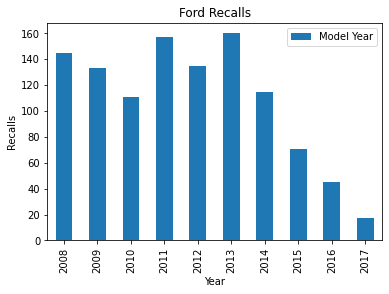

In [7]:
#Ford Recalls Bar Graph
ford_make_year_count.sort_index().plot(kind = "bar")
plt.title('Ford Recalls')
plt.xlabel('Year')
plt.ylabel('Recalls')

plt.savefig('Output/FordRecalls')
plt.show()

In [8]:
Peterbilt_make_year = test.loc[(test['Model Year'] >= 2008) & (test['Model Year'] < 9999)& (test['Recall Type'] == 'VEHICLE') ]

Peterbilt_make_year2 = Peterbilt_make_year.loc[(Peterbilt_make_year['Vehicle Make'] == 'PETERBILT')]

Peterbilt_make_year_count = (Peterbilt_make_year2["Model Year"].value_counts())
(Peterbilt_make_year_count.sort_index()).to_frame()

,Model Year
2008,173
2009,125
2010,102
2011,106
2012,112
2013,123
2014,123
2015,109
2016,73
2017,25


In [9]:
# Describe recall data for Peterbilt
Peterbilt_make_year_count.describe()

count     10.000000
mean     107.100000
std       38.190895
min       25.000000
25%      103.000000
50%      110.500000
75%      123.000000
max      173.000000
Name: Model Year, dtype: float64

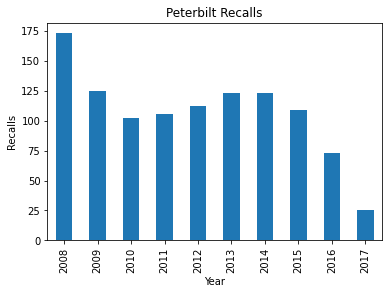

In [10]:
Peterbilt_make_year_count.sort_index().plot(kind = "bar")
plt.title('Peterbilt Recalls')
plt.xlabel('Year')
plt.ylabel('Recalls')

plt.savefig('Output/PeterbiltRecalls')
plt.show()

In [11]:
freightliner_make_year = test.loc[(test['Model Year'] >= 2008) & (test['Model Year'] < 9999)& (test['Recall Type'] == 'VEHICLE') ]

freightliner_make_year2 = freightliner_make_year.loc[(freightliner_make_year['Vehicle Make'] == 'FREIGHTLINER')]

freightliner_make_year_count = (freightliner_make_year2["Model Year"].value_counts())
(freightliner_make_year_count.sort_index()).to_frame()



,Model Year
2008,171
2009,114
2010,122
2011,116
2012,83
2013,72
2014,74
2015,75
2016,64
2017,22


In [12]:
# Describe recall data for Freightliner
freightliner_make_year_count.describe()

count     10.000000
mean      91.300000
std       40.789568
min       22.000000
25%       72.500000
50%       79.000000
75%      115.500000
max      171.000000
Name: Model Year, dtype: float64

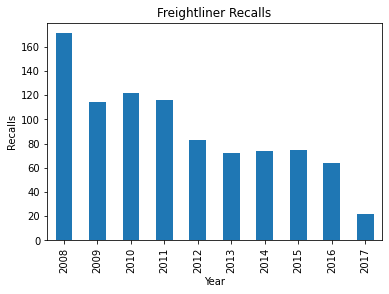

In [13]:
freightliner_make_year_count.sort_index().plot(kind = "bar")
plt.title('Freightliner Recalls')
plt.xlabel('Year')
plt.ylabel('Recalls')

plt.savefig('Output/FreightlinerRecalls')
plt.show()

In [14]:
toyota_make_year = test.loc[(test['Model Year'] >= 2008) & (test['Model Year'] < 9999)& (test['Recall Type'] == 'VEHICLE') ]

toyota_make_year2 = toyota_make_year.loc[(toyota_make_year['Vehicle Make'] == 'TOYOTA')]

toyota_make_year_count = (toyota_make_year2["Model Year"].value_counts())
(toyota_make_year_count.sort_index()).to_frame()


,Model Year
2008,130
2009,167
2010,175
2011,109
2012,79
2013,52
2014,44
2015,30
2016,26
2017,5


In [15]:
# Describe recall data for Toyota
toyota_make_year_count.describe()

count     10.000000
mean      81.700000
std       60.578782
min        5.000000
25%       33.500000
50%       65.500000
75%      124.750000
max      175.000000
Name: Model Year, dtype: float64

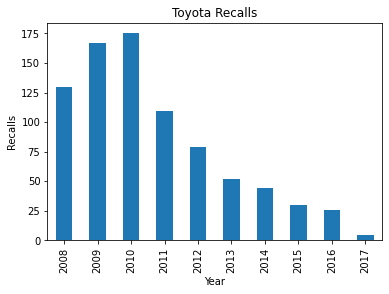

In [16]:
toyota_make_year_count.sort_index().plot(kind = "bar")
plt.title('Toyota Recalls')
plt.xlabel('Year')
plt.ylabel('Recalls')

plt.savefig('Output/ToyotaRecalls')
plt.show()

In [17]:
chevrolet_make_year = test.loc[(test['Model Year'] >= 2008) & (test['Model Year'] < 9999)& (test['Recall Type'] == 'VEHICLE') ]

chevrolet_make_year2 = chevrolet_make_year.loc[(chevrolet_make_year['Vehicle Make'] == 'CHEVROLET')]

chevrolet_make_year_count = (chevrolet_make_year2["Model Year"].value_counts())
(chevrolet_make_year_count.sort_index()).to_frame()





,Model Year
2008,79
2009,71
2010,50
2011,71
2012,61
2013,70
2014,111
2015,107
2016,74
2017,29


In [18]:
# Describe recall data for Chevrolet
chevrolet_make_year_count.describe()

count     10.000000
mean      72.300000
std       24.170919
min       29.000000
25%       63.250000
50%       71.000000
75%       77.750000
max      111.000000
Name: Model Year, dtype: float64

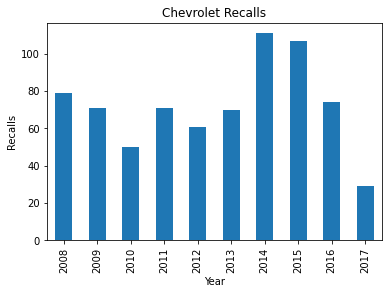

In [19]:
chevrolet_make_year_count.sort_index().plot(kind = "bar")
plt.title('Chevrolet Recalls')
plt.xlabel('Year')
plt.ylabel('Recalls')

plt.savefig('Output/ChevroletRecalls')
plt.show()

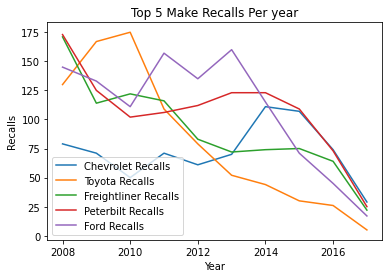

In [20]:
# Top 5 Make Recalls per year
plt.plot(chevrolet_make_year_count.sort_index(), label='Chevrolet Recalls')
plt.plot(toyota_make_year_count.sort_index(), label='Toyota Recalls')
plt.plot(freightliner_make_year_count.sort_index(), label='Freightliner Recalls')
plt.plot(Peterbilt_make_year_count.sort_index(), label='Peterbilt Recalls')
plt.plot(ford_make_year_count.sort_index(), label='Ford Recalls')
 
plt.title("Top 5 Make Recalls Per year")
plt.xlabel("Year")
plt.ylabel("Recalls")

plt.legend()
plt.savefig('Output/Top5Recalls')
plt.show()

In [21]:
#Top Recall Component
total_recall_count=test2["Recall Component"].value_counts()

total_recall_count.head(10)

equipment_count = total_recall_count[0] +total_recall_count[1] + total_recall_count[2]+total_recall_count[5]
electrical_system = total_recall_count[3]
tripleL = total_recall_count[4]
seats = total_recall_count[6]
engine = total_recall_count[7] +total_recall_count[8]

total_recall_df=pd.DataFrame({"Total Recalled Components":["Equipment","Eletrical System","Latches/Locks/Linkages","Seats","Engine"],"Total Count":[equipment_count,electrical_system,tripleL,seats,engine]})

total_recall_df = total_recall_df.sort_values(by = 'Total Count',ascending = False)

total_recall_df=total_recall_df.set_index("Total Recalled Components")
total_recall_df

,Total Count
Total Recalled Components,
Equipment,7945
Engine,1383
Eletrical System,1303
Latches/Locks/Linkages,1246
Seats,793


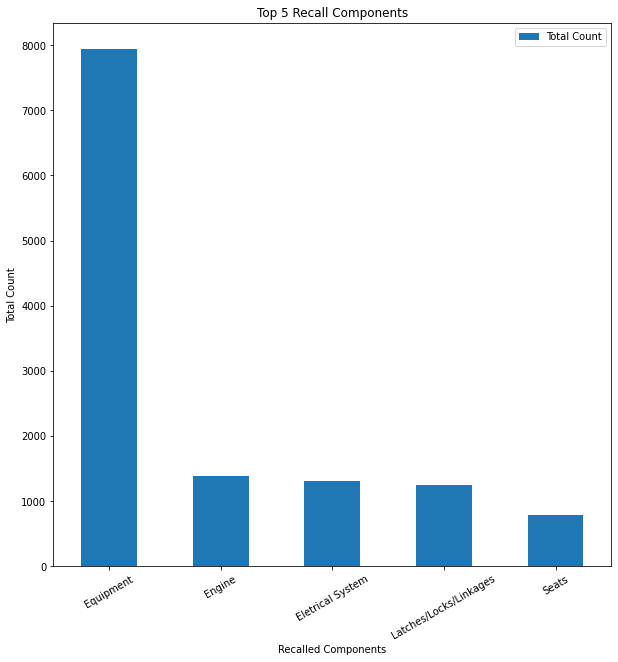

In [22]:
total_recall_df.plot(kind="bar", figsize=(10,10))

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Top 5 Recall Components")
plt.xlabel("Recalled Components")
plt.ylabel("Total Count")

plt.savefig('Output/Top 5 Recall Components')
plt.show()


In [23]:
#Ford top 5 Recall Component 
ford_recall_comp = ford_make_year2["Recall Component"].value_counts()

ford_recall_comp.head(10)

fequipment_count = ford_recall_comp[0] + ford_recall_comp[1] + ford_recall_comp[9]
fpower_train =  ford_recall_comp[2]
fengine_enginecooling_count =  ford_recall_comp[3]
fairbags_count =  ford_recall_comp[4]
flatches_locks_link_count =  ford_recall_comp[5]

ford_recall_df = pd.DataFrame({"Ford Recalled Components":["Equipment/Equipment Adaptive","Power Train","Engine and Engine Cooling","Air Bags","Latches/Locks/Linkages"],"Total Count":[fequipment_count,fpower_train,fengine_enginecooling_count,fairbags_count ,flatches_locks_link_count ]})

ford_recall_df=ford_recall_df.sort_values(by = 'Total Count',ascending = False)
ford_recall_df=ford_recall_df.set_index("Ford Recalled Components")
ford_recall_df

,Total Count
Ford Recalled Components,
Equipment/Equipment Adaptive,463
Power Train,35
Engine and Engine Cooling,29
Air Bags,25
Latches/Locks/Linkages,21


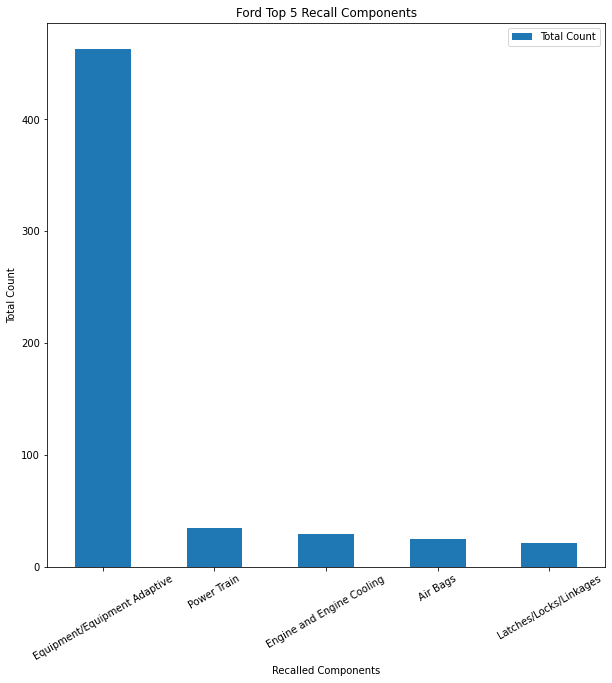

In [24]:
ford_recall_df.plot(kind="bar", figsize=(10,10))

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Ford Top 5 Recall Components")
plt.xlabel("Recalled Components")
plt.ylabel("Total Count")

plt.savefig('Output/Ford Top 5 Recall Components')
plt.show()

In [25]:
Peterbilt_recall_comp = Peterbilt_make_year2["Recall Component"].value_counts()

Peterbilt_recall_comp.head(10)

plabels = Peterbilt_recall_comp[0]
ptires = Peterbilt_recall_comp[1]
pelectrical_alternator = Peterbilt_recall_comp[2] + Peterbilt_recall_comp[5]
pengine_cooling = Peterbilt_recall_comp[3] +Peterbilt_recall_comp[8]
pair_bags = Peterbilt_recall_comp[5]

peterbilt_recall_df = pd.DataFrame({"Peterbilt Recalled Components":["Equipment","Tires","Electircal System","Engine and Engine Cooling","Air Bag"],"Total Counts":[plabels,ptires,pelectrical_alternator,pengine_cooling,pair_bags]})

peterbilt_recall_df=peterbilt_recall_df.set_index("Peterbilt Recalled Components")
peterbilt_recall_df


,Total Counts
Peterbilt Recalled Components,
Equipment,172
Tires,158
Electircal System,117
Engine and Engine Cooling,101
Air Bag,42


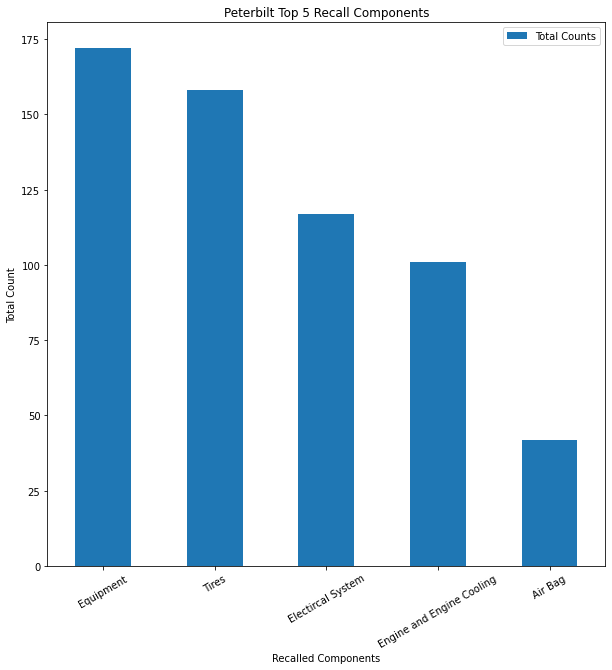

In [26]:
peterbilt_recall_df.plot(kind="bar", figsize=(10,10))

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Peterbilt Top 5 Recall Components")
plt.xlabel("Recalled Components")
plt.ylabel("Total Count")

plt.savefig('Output/Peterbilt Top 5 Recall Components')
plt.show()

In [27]:
freightliner_recall_comp = freightliner_make_year2["Recall Component"].value_counts()

freightliner_recall_comp.head(10)

frengine_cooling = freightliner_recall_comp[0] + freightliner_recall_comp[1] + freightliner_recall_comp[3]
service_brakes = freightliner_recall_comp[2]
fules_system = freightliner_recall_comp[4]
trailer_hitches = freightliner_recall_comp[5]
steering = freightliner_recall_comp[6]

freightliner_df = pd.DataFrame({"Freightliner Recalled Components":["Engine and Engine Cooling","Service Brakes","Fuel System","Trailer Hitches","Steering"],"Total Counts":[frengine_cooling,service_brakes,fules_system,trailer_hitches,steering]})
freightliner_df=freightliner_df.set_index("Freightliner Recalled Components")
freightliner_df

,Total Counts
Freightliner Recalled Components,
Engine and Engine Cooling,185
Service Brakes,46
Fuel System,30
Trailer Hitches,29
Steering,29


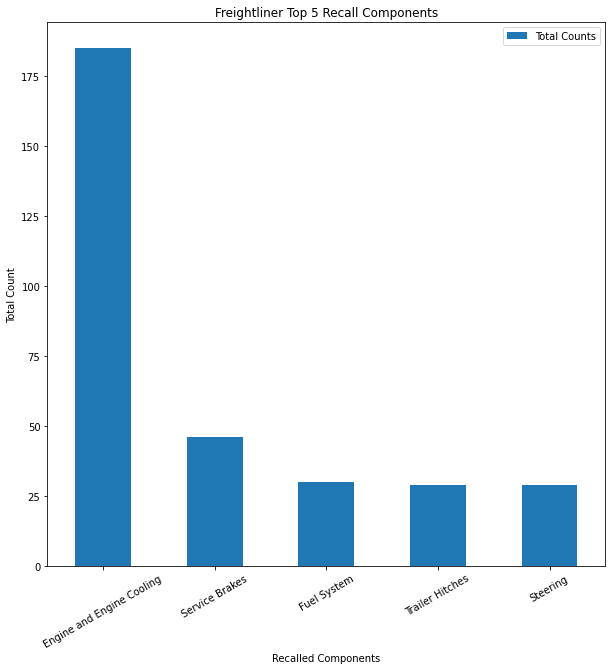

In [28]:
freightliner_df.plot(kind="bar", figsize=(10,10))

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Freightliner Top 5 Recall Components")
plt.xlabel("Recalled Components")
plt.ylabel("Total Count")

plt.savefig('Output/Freightliner Top 5 Recall Components')
plt.show()

In [29]:
toyota_recall_comp = toyota_make_year2["Recall Component"].value_counts()
toyota_recall_comp.head(10)

tseats = toyota_recall_comp[1] + toyota_recall_comp[2]
tequipment = toyota_recall_comp[0]
tairbags = toyota_recall_comp[3] + toyota_recall_comp[9] + toyota_recall_comp[7]
tspeed_contr = toyota_recall_comp[4]
tvisibility = toyota_recall_comp[5]

toyota_df = pd.DataFrame({"Toyota Recalled Components":["Equipment","Seats","Air Bags","Speed Controler","Visibility"],"Total Counts":[tequipment,tequipment,tairbags,tspeed_contr,tvisibility]})

toyota_df=toyota_df.set_index("Toyota Recalled Components")
toyota_df

,Total Counts
Toyota Recalled Components,
Equipment,180
Seats,180
Air Bags,97
Speed Controler,54
Visibility,43


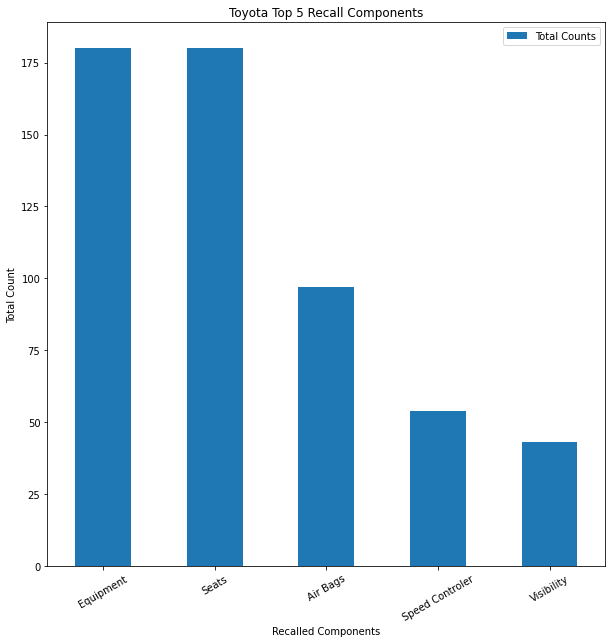

In [30]:
toyota_df.plot(kind="bar", figsize=(10,10))

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Toyota Top 5 Recall Components")
plt.xlabel("Recalled Components")
plt.ylabel("Total Count")

plt.savefig('Output/Toyota Top 5 Recall Components')
plt.show()

In [31]:
chevrolet_recall_comp = chevrolet_make_year2["Recall Component"].value_counts()
chevrolet_recall_comp.head(15)

celectrical_system = chevrolet_recall_comp[0] + chevrolet_recall_comp[7] + chevrolet_recall_comp[2]
cairbags = chevrolet_recall_comp[1] + chevrolet_recall_comp[3] + chevrolet_recall_comp[5] +chevrolet_recall_comp[6]
cequipment = chevrolet_recall_comp[9] + chevrolet_recall_comp[8]
cseat_belts = chevrolet_recall_comp[4]
csteering = chevrolet_recall_comp[10]

chev_df = pd.DataFrame({"Chevrolet Recalled Components":["Electrical System","Air Bags","Equipment","Seat Belts","Steering"],"Total Counts":[celectrical_system,cairbags,cequipment,cseat_belts,csteering]})

chev_df=chev_df.set_index("Chevrolet Recalled Components")
chev_df

,Total Counts
Chevrolet Recalled Components,
Electrical System,113
Air Bags,136
Equipment,45
Seat Belts,34
Steering,17


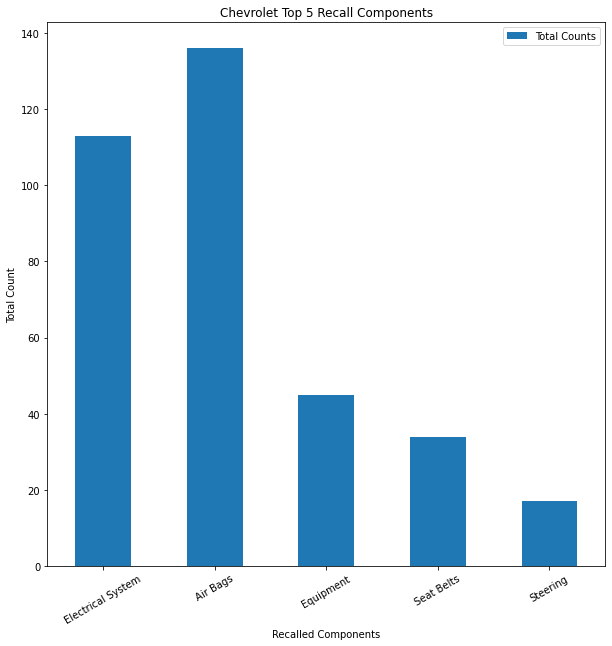

In [32]:
chev_df.plot(kind="bar", figsize=(10,10))

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Chevrolet Top 5 Recall Components")
plt.xlabel("Recalled Components")
plt.ylabel("Total Count")

plt.savefig('Output/Chevrolet Top 5 Recall Components')
plt.show()